# DSCI 303 - Homework 06
### Lauren Forti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Working with 2D Arrays

In [2]:
# set a seed of 1
np.random.seed(1)

# create 5x8 array of elements sampled uniformly on [0,10]
Z = np.random.uniform(low=0, high=10, size=(5,8))
# round elements to two decimal places
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
# print 3rd row
print(f'Row 3:    {Z[3,:]}')
# print 6th col
print(f'Column 6: {Z[:,6]}')

Row 3:    [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
Column 6: [1.86 0.27 3.13 0.98 0.18]


In [4]:
# sum of rows
rows = np.sum(Z, axis=1)
# sum of cols
cols = np.sum(Z, axis=0)
# total array sum
total = np.sum(Z)

# output results
print(f'Row Sums:    {rows}')
print(f'Column Sums: {cols}')
print(f'Array Sums:  {total}')

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sums:  183.68


## Part 2: Reshaping and Stacking Arrays

In [5]:
# set a seed of 167
np.random.seed(167)

# make 1D arrays with 1000 elements drawn from normal dist
x1 = np.random.normal(loc = 50, scale=10, size=1000)
x2 = np.random.normal(loc=20, scale=5, size=1000)
x3 = np.random.normal(loc=100, scale=30, size=1000)
x4 = np.random.normal(loc=10, scale=2, size=1000)

# reshape 1D arrays into col arrays
y1 = x1.reshape(1000,1)
y2 = x2.reshape(1000,1)
y3 = x3.reshape(1000,1)
y4 = x4.reshape(1000,1)

# combine col arrays into 1000x4 array
X = np.hstack([y1, y2, y3, y4])
X = np.round(X, 2)
print(X.shape)

(1000, 4)


In [6]:
# print first 6 rows
print(X[:6,:])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Part 3: Standardization

In [7]:
# calc col means
means = np.mean(X, axis=0)

# calc col std dev
stdv = np.std(X, axis=0)

# output results
print(f'Column means:              {np.round(means, 2)}')
print(f'Column standard deviation: {np.round(stdv, 2)}')

Column means:              [50.21 19.86 99.84 10.06]
Column standard deviation: [ 9.69  5.08 30.88  2.03]


In [8]:
# subtract means and divide result by std dev
W = (X - means)/stdv

# calc col means
Wmeans = np.mean(W, axis=0)

# calc col std dev
Wstdv = np.std(W, axis=0)

# output results
print(f'Column means:              {np.round(Wmeans, 2)}')
print(f'Column standard deviation: {np.round(Wstdv, 2)}')

Column means:              [ 0. -0. -0. -0.]
Column standard deviation: [1. 1. 1. 1.]


## Part 4: Load Auto MPG Dataset

In [9]:
# load txt file into a df
auto = pd.read_table('auto_mpg.txt', sep='\t')

# output first 10 rows
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
# get shape of df
auto.shape

(398, 5)

In [11]:
# get means of numeric cols
auto.mean()

C:\Users\laure\AppData\Local\Temp/ipykernel_22744/1998851515.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auto.mean()


mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

## Part 5: Regional Counts and Means

In [12]:
# get unique values of region col
regions = np.unique(auto.loc[:,'region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
# isolate by region
asia_auto = auto.loc[(auto.loc[:, 'region'] == 'asia'),:]
eur_auto = auto.loc[(auto.loc[:, 'region'] == 'eur'),:]
usa_auto = auto.loc[(auto.loc[:, 'region'] == 'usa'),:]

print(f'Number of cars manufactured in Asia:   {asia_auto.shape[0]}')
print(f'Number of cars manufactured in Europe: {eur_auto.shape[0]}')
print(f'Number of cars manufactured in USA:    {usa_auto.shape[0]}')

Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249


In [14]:
# get means of regions
asia_means = asia_auto.loc[:, ['mpg', 'cyl', 'wt']].mean()
eur_means = eur_auto.loc[:, ['mpg', 'cyl', 'wt']].mean()
usa_means = usa_auto.loc[:, ['mpg', 'cyl', 'wt']].mean()

# combine into one df
mean_df = pd.DataFrame(data = [asia_means, eur_means, usa_means],
                      index = regions)

# display new df
display(mean_df)

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Part 6: Average Weight and MPG by Region

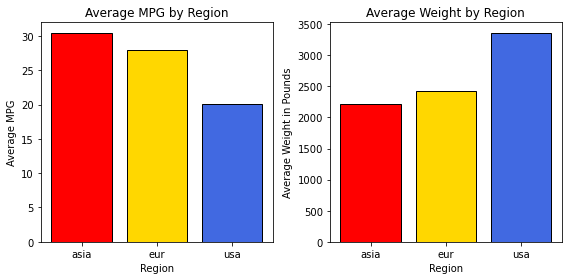

In [15]:
colors1 = ['red', 'gold', 'royalblue']

plt.figure(figsize=[8,4])

# plot MPG bar chart
plt.subplot(1, 2, 1)
plt.bar(x=regions, 
        height=mean_df['mpg'],
        color=colors1, 
        edgecolor='black')
# labels
plt.title('Average MPG by Region')
plt.xlabel('Region')
plt.ylabel('Average MPG')

# plot weight bar chart
plt.subplot(1, 2, 2)
plt.bar(x=regions, 
        height=mean_df['wt'], 
        color=colors1, 
        edgecolor='black')
# labels
plt.title('Average Weight by Region')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')

plt.tight_layout()
plt.show()

## Part 7: Relationship between Weight and Miles Per Gallon

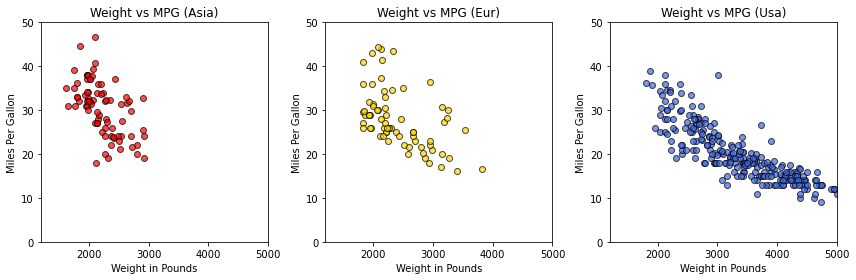

In [16]:
plt.figure(figsize=[12,4])

i = 0
sel = 0

for r in regions:    
    # select wt and mpg for region
    sel = auto.loc[(auto.loc[:, 'region'] == r),:]

    # make scatter plot
    plt.subplot(1,3,i+1)
    plt.scatter(x=sel.loc[:, 'wt'], 
                y=sel.loc[:, 'mpg'], 
                alpha=0.7, 
                color=colors1[i],
                edgecolor='black')
    
    # add axes limits
    plt.xlim([1200, 5000])
    plt.ylim([0, 50])
    
    # add labels
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Weight vs MPG ({r.capitalize()})')
    i += 1

plt.tight_layout()
plt.show()

## Part 8: Cylinder Distribution by Region

In [17]:
# get unique cyl values
cyl_values = np.unique(auto.loc[:,'cyl'])
print(cyl_values)

[3 4 5 6 8]


In [18]:
# get cyl by region df
cyl_counts_by_region = pd.crosstab(auto.loc[:,'cyl'], auto.loc[:,'region'])
display(cyl_counts_by_region)

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


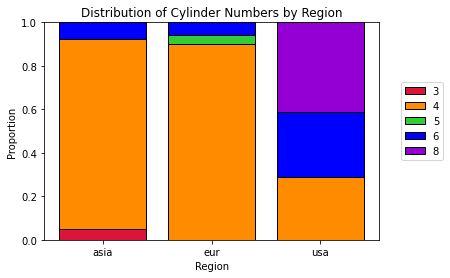

In [19]:
# get proportions
cyl_props_by_region = cyl_counts_by_region/(cyl_counts_by_region.sum())

# bottom of each bar for stacked bar chart
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region

colors2 = ['crimson', 'darkorange', 'limegreen', 'blue', 'darkviolet']

plt.figure(figsize=[6,4])

# plot each region's cyl
for i in range(cyl_props_by_region.shape[0]):
    plt.bar(regions,
            cyl_props_by_region.iloc[i,:], 
            label=cyl_values[i], 
            color=colors2[i],
            bottom=bar_bottoms.iloc[i,:],
            edgecolor='black')
    
# legend and labels
plt.legend(bbox_to_anchor=(1.05,0.75))
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')

plt.show()